In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
def readData(filename):
    f = open(filename)
    ret=[]
    for each_line in f.readlines():
        data_arr=each_line.strip().split(",")
        temp=[]
        for i in range(len(data_arr)):
            temp.append(float(data_arr[i]))
        ret.append(temp)
    return np.array(ret)
def normalization(x):
    n=x.shape[1]
    for i in range(n):
        x_max=np.max(x[:,i])
        x_min=np.min(x[:,i])
        x[:,i]=(x[:,i]-x_min)/(x_max-x_min)
    return x



In [62]:
data= readData("ex1data2.txt")

梯度下降法结果为:
[[182975.89751039]
 [465843.4413692 ]
 [ 17736.28231105]]
正规方程法的结果为:
[[199467.38469349]
 [504777.90398791]
 [-34952.07644931]]


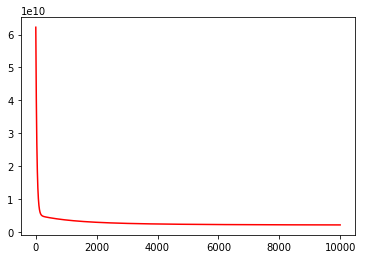

In [81]:
x = data[:,:-1]
y = data[:,-1:]
m=x.shape[0]#样本的数目
n=x.shape[1]#特征的数目
x_norm=normalization(x)#特征的归一化
one=np.ones([m,1])
X=np.hstack([one,x_norm])

theta=np.array([[10000],[0],[0]])
a=0.01
max_iter=10000
J=[]
for i in range(max_iter):
    J.append(np.sum(np.square(X.dot(theta)-y))/(2*m))
    d=X.T.dot(X.dot(theta)-y)/m
    theta = theta - a*d
plt.plot(np.arange(max_iter),J,'-r')
print("梯度下降法结果为:\n"+str(theta))
print("正规方程法的结果为:\n"+str(np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)))